In [15]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [16]:
train_file_path = r"D:\coding-practice\ml_projects\hpuse_price_prediction\train.csv"
train_data= pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(train_data.shape))

Full train dataset shape is (1460, 81)


In [17]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Fill missing values for numerical columns with median and categorical with mode
for column in train_data.columns:
    if train_data[column].isnull().any():
        if train_data[column].dtype == 'object':
            train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        else:
            train_data[column].fillna(train_data[column].median(), inplace=True)

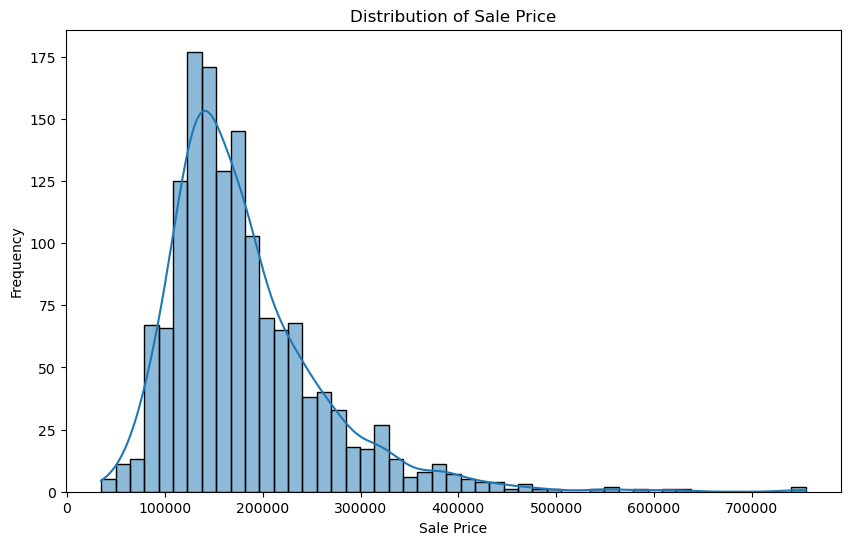

In [18]:
# Explore the dependent variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1000 with 0 Axes>

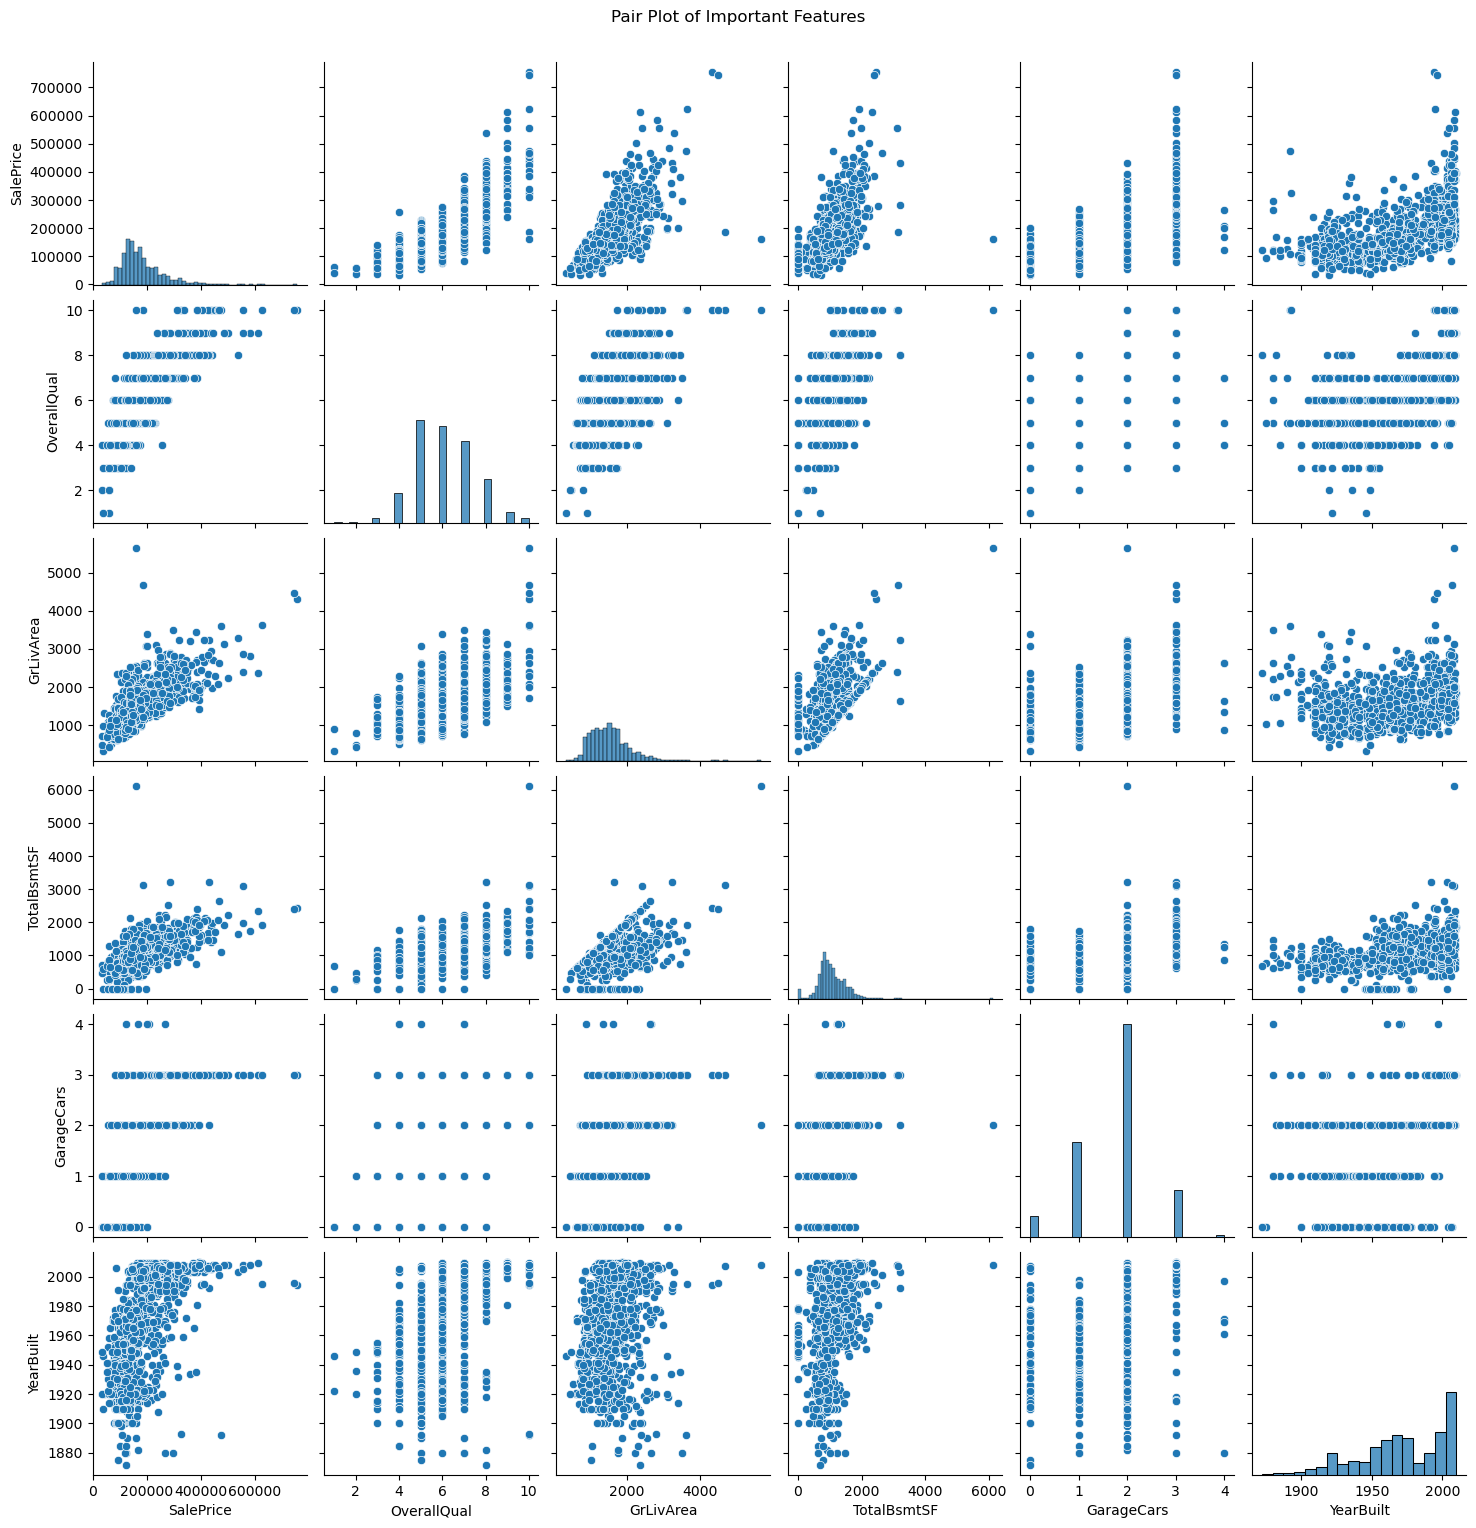

In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select important columns for pair plot
important_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']

# Create a pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(train_data[important_columns])
plt.suptitle('Pair Plot of Important Features', y=1.02)
plt.show()

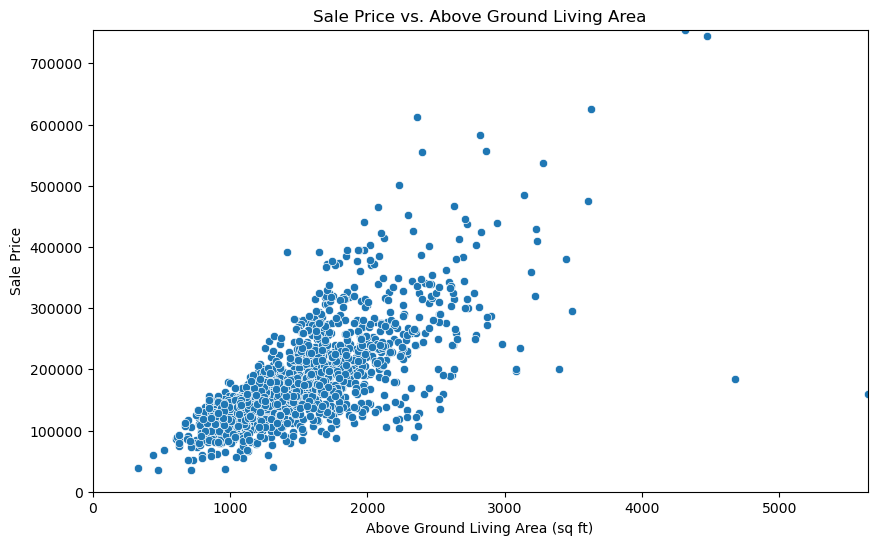

In [20]:
# Scatter plot for SalePrice vs. GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.xlim(0, train_data['GrLivArea'].max())
plt.ylim(0, train_data['SalePrice'].max())
plt.show()

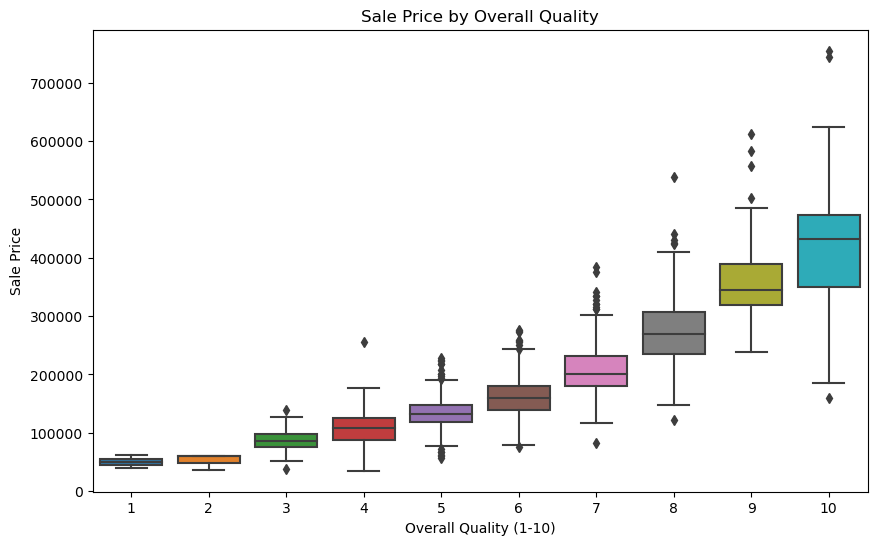

In [21]:
# Box plot for SalePrice by OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality (1-10)')
plt.ylabel('Sale Price')
plt.show()


In [22]:
# Log transformation of SalePrice for normalization
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

# Create dummy variables for categorical features
train_data = pd.get_dummies(train_data, drop_first=True)

In [23]:
# Split the data into features and target variable
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_preds = lr_model.predict(X_val)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_val, lr_preds)))
print("Linear Regression R^2:", r2_score(y_val, lr_preds))

Linear Regression RMSE: 0.2131327181567755
Linear Regression R^2: 0.756576202224966


In [25]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_val, rf_preds)))
print("Random Forest R^2:", r2_score(y_val, rf_preds))

Random Forest RMSE: 0.1475958721417009
Random Forest R^2: 0.8832622792581369


In [26]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_val, xgb_preds)))
print("XGBoost R^2:", r2_score(y_val, xgb_preds))

XGBoost RMSE: 0.14242778280094243
XGBoost R^2: 0.8912943258755942


In [27]:
# Apply PCA to reduce dimensionality if necessary
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_train)

# Fit model on PCA transformed data (optional)
xgb_pca_model = XGBRegressor(random_state=42)
xgb_pca_model.fit(X_pca, y_train)

# Predict using PCA transformed validation set (if applicable)
X_val_pca = pca.transform(X_val)
pca_preds = xgb_pca_model.predict(X_val_pca)
print("PCA XGBoost RMSE:", np.sqrt(mean_squared_error(y_val, pca_preds)))

PCA XGBoost RMSE: 0.3991831832177685


In [28]:
# Step 9: Prepare submission file for test data predictions using the best model (e.g., XGBoost)

# Load test data
test_file_path = r"D:\coding-practice\ml_projects\hpuse_price_prediction\test.csv"
test_data = pd.read_csv(test_file_path)

# Clean test data similarly to training data
# Fill missing values in test data
for column in test_data.columns:
    if test_data[column].isnull().any():
        if test_data[column].dtype == 'object':
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
        else:
            test_data[column].fillna(test_data[column].median(), inplace=True)

# Drop 'Id' from test data for prediction
test_data_cleaned = test_data.drop(columns=['Id'])

# Create dummy variables for categorical features in test data
test_data_cleaned = pd.get_dummies(test_data_cleaned, drop_first=True)

# Align the columns of train and test datasets
X_train_columns = X_train.columns
test_data_cleaned = test_data_cleaned.reindex(columns=X_train_columns, fill_value=0)

# Predict on cleaned test data using the best model (e.g., XGBoost)
final_predictions = xgb_model.predict(test_data_cleaned)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'Id': test_data['Id'],  # Include Id for submission
    'SalePrice': np.expm1(final_predictions)  # Inverse log transformation for submission
})

# Save to CSV file
submission_df.to_csv('submission.csv', index=False)